In [1]:
import pandas as pd
import numpy as np

import random

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy.stats import norm
from scipy.stats import t

In [5]:
df = pd.read_excel('Данные для тестового задания.xlsx', sheet_name='Данные об аудитории')
df.head()

,date,user_id,view_adverts
0,2023-11-11,8c020470-8461-11ed-83d0-552e8cc749d6,13
1,2023-11-18,5875f070-7b92-11ee-a6fb-8b298e83f4f7,14
2,2023-11-29,3c2d27c0-4fd6-11eb-b89f-2ffb31b67dd6,21
3,2023-11-29,234a96d0-ad16-11ed-a2e6-793ddfeeba1f,23
4,2023-11-29,4d07c180-644f-11eb-879c-b7c02edf4f37,12


1. Во вкладке "Данные об аудитории" информация о пользователях, посетивших наше приложение в ноябре. Чему равен MAU продукта? 
*MAU (Monthly Active Users) — это метрика, используемая для измерения активности пользователей в течение одного месяца. Она показывает количество уникальных пользователей, которые взаимодействовали с продуктом, сервисом или приложением хотя бы один раз за последний месяц.


In [6]:
# Преобразуем дату в формат datetime
df['date'] = pd.to_datetime(df['date'])

# Фильтруем данные за ноябрь 2023 года
df_november = df[(df['date'].dt.year == 2023) & (df['date'].dt.month == 11)]

# Количество уникальных пользователей (MAU)
mau = df_november['user_id'].nunique()

print(f"MAU за ноябрь 2023: {mau}")

MAU за ноябрь 2023: 7639


2. Используя вкладку "Данные об аудитории", посчитайте, чему будет равен DAU 
*DAU (Daily Active Users) — это метрика, которая показывает количество уникальных пользователей, которые взаимодействовали с продуктом, приложением или сервисом хотя бы один раз в течение дня. DAU помогает понять, сколько пользователей активно пользуются продуктом каждый день.


In [20]:
#2. Используя вкладку "Данные об аудитории", посчитайте, чему будет равен DAU 
# Считаем количество уникальных пользователей для каждого дня
dau = df.groupby('date')['user_id'].nunique().reset_index()

# Выводим результат
print(dau)

         date  user_id
0  2023-11-01      623
1  2023-11-02      649
2  2023-11-03      573
3  2023-11-04      343
4  2023-11-05      350
5  2023-11-06      660
6  2023-11-07      629
7  2023-11-08      600
8  2023-11-09      661
9  2023-11-10      583
10 2023-11-11      354
11 2023-11-12      377
12 2023-11-13      646
13 2023-11-14      687
14 2023-11-15      690
15 2023-11-16      639
16 2023-11-17      585
17 2023-11-18      412
18 2023-11-19      378
19 2023-11-20      711
20 2023-11-21      651
21 2023-11-22      608
22 2023-11-23      632
23 2023-11-24      595
24 2023-11-25      366
25 2023-11-26      372
26 2023-11-27      589
27 2023-11-28      610
28 2023-11-29      621
29 2023-11-30      620


In [21]:
average_dau = dau['user_id'].mean()
print(f"Средний DAU за ноябрь: {average_dau:.2f}")

Средний DAU за ноябрь: 560.47


3. Используя вкладку "Данные об аудитории", посчитайте, чему будет равен retention первого дня у пользователей, пришедших в продукт 1 ноября 
Retention (удержание пользователей) — это метрика, которая показывает, сколько пользователей продолжает пользоваться продуктом через определенный промежуток времени после первоначального взаимодействия. Retention можно рассчитать как процент пользователей, вернувшихся в продукт через определенное время (например, через 1 день, 1 неделю, 1 месяц) от количества всех новых пользователей.


In [22]:
# Преобразуем дату в datetime
df['date'] = pd.to_datetime(df['date'])

# Находим пользователей, которые впервые зашли в продукт 1 ноября
first_nov_users = df[df['date'] == '2023-11-01']['user_id'].unique()

# Смотрим, сколько из них вернулись 2 ноября
retained_users = df[(df['date'] == '2023-11-02') & (df['user_id'].isin(first_nov_users))]['user_id'].nunique()

# Общее количество новых пользователей 1 ноября
total_new_users = len(first_nov_users)

# Рассчитываем ретеншн первого дня (в процентах)
retention_rate = (retained_users / total_new_users) * 100 if total_new_users > 0 else 0

print(f"Day 1 Retention (удержание первого дня) за 1 ноября: {retention_rate:.2f}%")

Day 1 Retention (удержание первого дня) за 1 ноября: 26.65%


5. Во вкладке "Данные об аудитории" есть информация о том, сколько объявлений посмотрел каждый пользователь (view_adverts). Посчитайте пользовательскую конверсию в просмотр объявления за ноябрь? (в пользователях) 

In [23]:
# Считаем пользователей, которые посмотрели хотя бы одно объявление
viewers = df_november[df_november['view_adverts'] > 0]['user_id'].nunique()

# Рассчитываем конверсию в просмотр объявления
conversion_rate = (viewers / mau) * 100 if mau > 0 else 0

print(f"Пользовательская конверсия в просмотр объявления за ноябрь: {conversion_rate:.2f}%")

Пользовательская конверсия в просмотр объявления за ноябрь: 46.31%


6. Используя информацию из вкладки "Данные об аудитории", посчитайте среднее количество просмотренных объявлений на пользователя в ноябре

In [25]:
# Считаем общее количество просмотров объявлений
total_views = df_november['view_adverts'].sum()
# Рассчитываем среднее количество просмотров на пользователя
avg_views_per_user = total_views / mau if mau > 0 else 0

print(f"Среднее количество просмотренных объявлений на пользователя в ноябре: {avg_views_per_user:.2f}")

Среднее количество просмотренных объявлений на пользователя в ноябре: 2.87


7. Мы провели опрос среди 2000 пользователей. Из них 500 «критики», 1200 «сторонники» и 300 «нейтралы». Посчитайте, чему будет равен NPS 
* NPS (Net Promoter Score) — это метрика, которая измеряет лояльность пользователей к компании или продукту и делит их на три группы: Сторонники (Promoters) , Нейтралы (Passives),  Критики (Detractors). NPS высчитывается как (% сторонников - % критиков).


In [26]:
# Данные
total_respondents = 2000
promoters = 1200
passives = 300
detractors = 500

# Вычисляем процентные доли
promoters_pct = (promoters / total_respondents) * 100
detractors_pct = (detractors / total_respondents) * 100

# Рассчитываем NPS
nps = promoters_pct - detractors_pct

print(f"NPS: {nps:.2f}")

NPS: 35.00


8. Во вкладке "Данные АБ-тестов" результаты трех несвязанных АБ тестов для ARPU (общая выручка/общее количество пользователей).
Посмотрите на результаты тестов и интерпретируйте их. Напишите значения p-value, которые вы получили.


In [28]:
df = pd.read_excel('Данные для тестового задания.xlsx', sheet_name='Данные АБ тестов')
df.head()

,experiment_num,experiment_group,user_id,revenue
0,1,test,38456,520
1,1,control,13125924,806
2,1,control,9761984,0
3,1,test,11387012,208
4,1,test,18319648,104


In [32]:
from scipy.stats import ttest_ind
# Создаем функцию для анализа каждого эксперимента
def analyze_experiment(df, experiment_num):
    df_exp = df[df['experiment_num'] == experiment_num]

    # Разделяем группы
    control = df_exp[df_exp['experiment_group'] == 'control']['revenue']
    test = df_exp[df_exp['experiment_group'] == 'test']['revenue']

    # Вычисляем средний ARPU
    arpu_control = control.mean()
    arpu_test = test.mean()

    # Выполняем t-тест
    t_stat, p_value = ttest_ind(test, control, equal_var=False)

    print(f"\nЭксперимент {experiment_num}:")
    print(f"Средний ARPU в контрольной группе: {arpu_control:.2f}")
    print(f"Средний ARPU в тестовой группе: {arpu_test:.2f}")
    print(f"P-value: {p_value:.4f}")

    # Интерпретация результатов
    if p_value < 0.05:
        print("❗ Различие статистически значимо → тестовая гипотеза подтверждена.")
    else:
        print("✅ Различие НЕ статистически значимо → нововведение не дало эффекта.")

# Анализируем все 3 эксперимента
for exp_num in df['experiment_num'].unique():
    analyze_experiment(df, exp_num)


Эксперимент 1:
Средний ARPU в контрольной группе: 722.46
Средний ARPU в тестовой группе: 665.74
P-value: 0.6890
✅ Различие НЕ статистически значимо → нововведение не дало эффекта.

Эксперимент 2:
Средний ARPU в контрольной группе: 704.65
Средний ARPU в тестовой группе: 332.93
P-value: 0.0011
❗ Различие статистически значимо → тестовая гипотеза подтверждена.

Эксперимент 3:
Средний ARPU в контрольной группе: 663.21
Средний ARPU в тестовой группе: 998.67
P-value: 0.0603
✅ Различие НЕ статистически значимо → нововведение не дало эффекта.


9. По датасету с листерами посчитайте средний доход на пользователя

In [33]:
df = pd.read_excel('Данные для тестового задания.xlsx', sheet_name='Листеры')
df.head()

,user_id,date,cnt_adverts,age,cnt_contacts,revenue
0,100,2022-01-01,6,21,119,53
1,100,2022-01-02,2,21,200,18
2,100,2022-01-03,6,21,193,42
3,100,2022-01-04,2,21,143,38
4,100,2022-01-05,2,21,190,40


In [36]:
arpu=df['revenue'].sum()/df['user_id'].nunique()
print(f"Средний доход на пользователя (ARPU): {arpu:.2f}")

Средний доход на пользователя (ARPU): 156.48


10. По датасету с листерами посчитайте медиану возраста пользователя 

In [37]:
df['age'].median()

28.0

12. На каком графике бимодальное распределение?

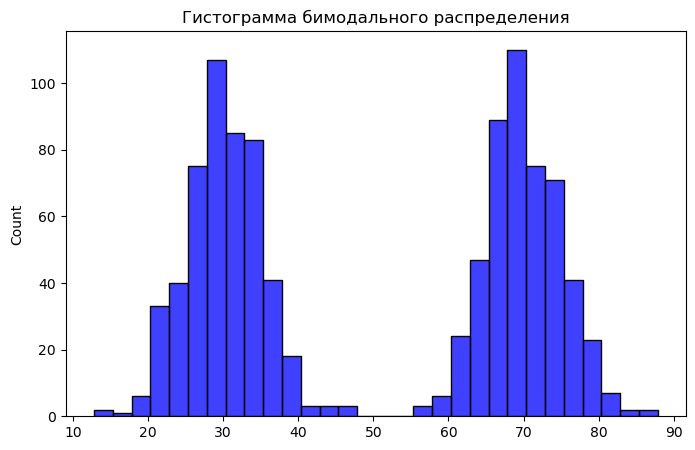

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Создаем искусственное бимодальное распределение
data1 = np.random.normal(30, 5, 500)  # Первая мода (центр около 30)
data2 = np.random.normal(70, 5, 500)  # Вторая мода (центр около 70)
data = np.concatenate([data1, data2])  # Объединяем данные

# Строим гистограмму
plt.figure(figsize=(8, 5))
sns.histplot(data, bins=30, kde=False, color='blue')  # kde=False, чтобы оставить чистую гистограмму
plt.title("Гистограмма бимодального распределения")
plt.show()

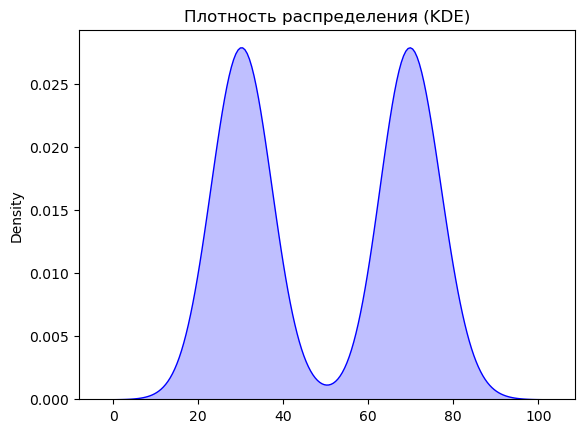

In [39]:
sns.kdeplot(data, fill=True, color="blue")
plt.title("Плотность распределения (KDE)")
plt.show()

13. Какая случайная величина имеет наибольшую дисперсию данных по следующим графикам плотности распределения? 

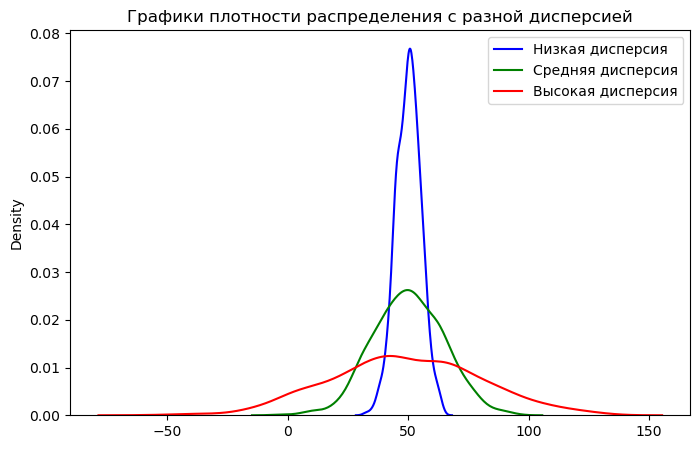

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Генерируем три случайных распределения с разной дисперсией
data_low_var = np.random.normal(50, 5, 1000)   # Низкая дисперсия (std=5)
data_med_var = np.random.normal(50, 15, 1000)  # Средняя дисперсия (std=15)
data_high_var = np.random.normal(50, 30, 1000) # Высокая дисперсия (std=30)

# Строим KDE-графики
plt.figure(figsize=(8, 5))
sns.kdeplot(data_low_var, label="Низкая дисперсия", color="blue")
sns.kdeplot(data_med_var, label="Средняя дисперсия", color="green")
sns.kdeplot(data_high_var, label="Высокая дисперсия", color="red")

plt.legend()
plt.title("Графики плотности распределения с разной дисперсией")
plt.show()

14. На каком графике можно посчитать корреляцию?

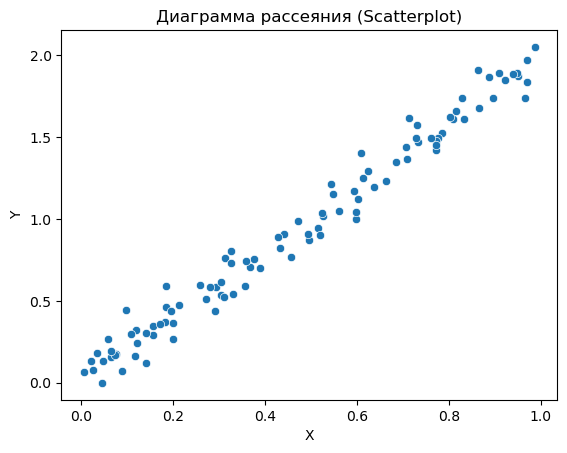

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Пример данных
import numpy as np
import pandas as pd
np.random.seed(42)
x = np.random.rand(100)
y = 2 * x + np.random.normal(0, 0.1, 100)  # Линейная зависимость с шумом

df = pd.DataFrame({'X': x, 'Y': y})

# Строим scatterplot
sns.scatterplot(x='X', y='Y', data=df)
plt.title("Диаграмма рассеяния (Scatterplot)")
plt.show()

18. Были получены следующие результаты. Коллеги просят вас подтвердить их и сделать окончательный вывод по эксперименту.
•	Вариант A (контрольная группа) — 100 047 501 посетитель, 1003 платежа.
•	Вариант B (тестовая группа) — 100 001 055 посетителей, 1099 платежей.
Какие рекомендации вы бы дали, основываясь на этих данных?

In [43]:
import scipy.stats as stats
import numpy as np

# Данные
visitors_A, payments_A = 100047501, 1003
visitors_B, payments_B = 100001055, 1099

# Создаем таблицу сопряженности
contingency_table = np.array([
    [payments_A, visitors_A - payments_A],
    [payments_B, visitors_B - payments_B]
])

# Хи-квадрат тест
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"χ²-статистика: {chi2:.4f}, p-value: {p_value:.6f}")

if p_value < 0.05:
    print(f"Разница значима, тестовая группа действительно лучше")
else :
    print(f"Разница не значима, эффект случайный.")

χ²-статистика: 4.3378, p-value: 0.037275
Разница значима, тестовая группа действительно лучше
